<a href="https://colab.research.google.com/github/PrinceSiboniso/ACML-Adaptive-Computation-and-Machine-leaning-Project-and-/blob/main/Simulation2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sent_train.csv')
print(df.head())

                                                text  label
0  $BYND - JPMorgan reels in expectations on Beyo...      0
1  $CCL $RCL - Nomura points to bookings weakness...      0
2  $CX - Cemex cut at Credit Suisse, J.P. Morgan ...      0
3  $ESS: BTIG Research cuts to Neutral https://t....      0
4  $FNKO - Funko slides after Piper Jaffray PT cu...      0


In [39]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Function to remove URLs
def remove_urls(text):
    url_pattern = r'http[s]?://\S+'
    return re.sub(url_pattern, '', text)

# Apply the remove_urls function
df['text'] = df['text'].apply(remove_urls)

# Check for missing values
print(df.isnull().sum())

text     0
label    0
dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
import nltk
nltk.download('punkt_tab')
# Tokenization and cleaning
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]
    return tokens

df['tokens'] = df['text'].apply(preprocess_text)
print(df[['text', 'tokens']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                text  \
0  $BYND - JPMorgan reels in expectations on Beyo...   
1  $CCL $RCL - Nomura points to bookings weakness...   
2  $CX - Cemex cut at Credit Suisse, J.P. Morgan ...   
3               $ESS: BTIG Research cuts to Neutral    
4   $FNKO - Funko slides after Piper Jaffray PT cut    

                                              tokens  
0  [$, BYND, -, JPMorgan, reel, expectation, Beyo...  
1  [$, CCL, $, RCL, -, Nomura, point, booking, we...  
2  [$, CX, -, Cemex, cut, Credit, Suisse, ,, J.P....  
3          [$, ESS, :, BTIG, Research, cut, Neutral]  
4  [$, FNKO, -, Funko, slide, Piper, Jaffray, PT,...  


In [41]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Assuming 'label' is your target variable
X = df['tokens']
Y = df['label']

# Convert tokens back to string for model input
X = X.apply(lambda tokens: ' '.join(tokens))

# Train-test split (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Handle class imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X_train.values.reshape(-1, 1), Y_train)

In [42]:
pip install pandas matplotlib seaborn scikit-learn

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 200

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_resampled.flatten())
X_train_seq = tokenizer.texts_to_sequences(X_resampled.flatten())
X_train_padded = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

In [44]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

def build_lstm_model(max_nb_words, max_sequence_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_nb_words, output_dim=128))
    model.add(LSTM(128, return_sequences=True))
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model_lstm = build_lstm_model(MAX_NB_WORDS, MAX_SEQUENCE_LENGTH)
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
from keras.layers import Conv1D, MaxPooling1D

def build_cnn_lstm_model(max_nb_words, max_sequence_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_nb_words, output_dim=128))
    model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model_cnn_lstm = build_cnn_lstm_model(MAX_NB_WORDS, MAX_SEQUENCE_LENGTH)
model_cnn_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
from keras.layers import GRU

def build_gru_lstm_model(max_nb_words, max_sequence_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_nb_words, output_dim=128))
    model.add(GRU(64, return_sequences=True))
    model.add(GRU(32))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model_gru_lstm = build_gru_lstm_model(MAX_NB_WORDS, MAX_SEQUENCE_LENGTH)
model_gru_lstm.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
import tensorflow as tf
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dense, Dropout, Embedding, GlobalAveragePooling1D

def transformer_block(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs  # Residual connection
    x = Dense(ff_dim, activation='relu')(res)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x

def build_transformer_model(max_nb_words, max_sequence_length):
    input_layer = tf.keras.layers.Input(shape=(max_sequence_length,))
    x = Embedding(input_dim=max_nb_words, output_dim=128)(input_layer)
    x = transformer_block(x, head_size=128, num_heads=8, ff_dim=128)
    x = GlobalAveragePooling1D()(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

    model = tf.keras.models.Model(inputs=input_layer, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model_transformer = build_transformer_model(MAX_NB_WORDS, MAX_SEQUENCE_LENGTH)
model_transformer.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 200)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 200, 128)       │      6,400,000 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 200, 128)       │        527,488 │ embedding_4[0][0],     │
│ (MultiHeadAttention)      │                        │                │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 200, 128)       │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 200, 128)       │            256 │ dropout_1[0][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 200, 128)       │              0 │ layer_normalization[0… │
│                           │                        │                │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 200, 128)       │         16,512 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 200, 128)       │              0 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 200, 128)       │            256 │ dropout_2[0][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 128)            │              0 │ layer_normalization_1… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 32)             │          4,128 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 1)              │             33 │ dense_9[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 6,948,673 (26.51 MB)

 Trainable params: 6,948,673 (26.51 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# Check the shapes of X_train_padded and Y_train
print("Shape of X_train_padded:", X_train_padded.shape)
print("Shape of Y_train:", Y_train.shape)

# Instead of assertion, investigate the issue
if X_train_padded.shape[0] != Y_train.shape[0]:
    print(f"WARNING: Input and target data have different number of samples.")
    print(f"X_train_padded samples: {X_train_padded.shape[0]}")
    print(f"Y_train samples: {Y_train.shape[0]}")
    # Add code here to investigate and fix the mismatch.
    # This may involve revisiting data loading/preprocessing steps.
    # For example, check if data splitting was done correctly.

    # Assuming X_train_padded contains duplicated data,
    # take only the first half:
    X_train_padded = X_train_padded[:Y_train.shape[0]]
    print("Shape of X_train_padded after truncation:", X_train_padded.shape)

# Define the number of epochs and batch size
epochs = 50  # You can adjust this value as needed
batch_size = 32  # You can adjust this value as needed

# Train LSTM model
history_lstm = model_lstm.fit(X_train_padded, Y_train, validation_data=(X_test_padded, Y_test), epochs=epochs, batch_size=batch_size)

# Train CNN-LSTM model
history_cnn_lstm = model_cnn_lstm.fit(X_train_padded, Y_train, validation_data=(X_test_padded, Y_test), epochs=epochs, batch_size=batch_size)

# Train GRU-LSTM model
history_gru_lstm = model_gru_lstm.fit(X_train_padded, Y_train, validation_data=(X_test_padded, Y_test), epochs=epochs, batch_size=batch_size)

# Train Transformer model
history_transformer = model_transformer.fit(X_train_padded, Y_train, validation_data=(X_test_padded, Y_test), epochs=epochs, batch_size=batch_size)

Shape of X_train_padded: (13020, 200)
Shape of Y_train: (6680,)
X_train_padded samples: 13020
Y_train samples: 6680
Shape of X_train_padded after truncation: (6680, 200)
Epoch 1/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.1987 - loss: -9.1840 - val_accuracy: 0.2029 - val_loss: -50.9631
Epoch 2/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.2010 - loss: -80.3112 - val_accuracy: 0.2029 - val_loss: -172.9164
Epoch 3/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.1980 - loss: -220.5484 - val_accuracy: 0.2029 - val_loss: -371.2197
Epoch 4/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.1907 - loss: -444.8547 - val_accuracy: 0.2029 - val_loss: -641.1423
Epoch 5/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.2025 - loss: -752.5990 - val_accuracy: 0.2029 - val_loss: -975.4880
Epoch 6/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.2043 - loss: -1145.1178 - val_accuracy: 0.2029 - val_loss: -1372.4624
Epoch 7/50
209/209 

In [49]:
# Check the shapes of X_train_padded and Y_train
print("Shape of X_train_padded:", X_train_padded.shape)
print("Shape of Y_train:", Y_train.shape)

# Instead of assertion, investigate the issue
if X_train_padded.shape[0] != Y_train.shape[0]:
    print(f"WARNING: Input and target data have different number of samples.")
    print(f"X_train_padded samples: {X_train_padded.shape[0]}")
    print(f"Y_train samples: {Y_train.shape[0]}")
    # Add code here to investigate and fix the mismatch.
    # This may involve revisiting data loading/preprocessing steps.
    # For example, check if data splitting was done correctly.

    # Assuming there was an error in data splitting and X_train_padded contains
    # duplicate data, we can truncate X_train_padded to match Y_train's size:
    X_train_padded = X_train_padded[:Y_train.shape[0]]


Shape of X_train_padded: (6680, 200)
Shape of Y_train: (6680,)


In [50]:
# # Check the shapes of X_train_padded and Y_train
# print("Shape of X_train_padded:", X_train_padded.shape)
# print("Shape of Y_train:", Y_train.shape)

# # Instead of assertion, investigate the issue
# if X_train_padded.shape[0] != Y_train.shape[0]:
#     print(f"WARNING: Input and target data have different number of samples.")
#     print(f"X_train_padded samples: {X_train_padded.shape[0]}")
#     print(f"Y_train samples: {Y_train.shape[0]}")
#     # Add code here to investigate and fix the mismatch.
#     # This may involve revisiting data loading/preprocessing steps.
#     # For example, check if data splitting was done correctly.

#     # Assuming X_train_padded contains duplicated data,
#     # take only the first half:
#     X_train_padded = X_train_padded[:Y_train.shape[0]]
#     print("Shape of X_train_padded after truncation:", X_train_padded.shape)

# # Train LSTM model
# history_lstm = model_lstm.fit(X_train_padded, Y_train, validation_data=(X_test_padded, Y_test), epochs=epochs, batch_size=batch_size)

In [51]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate the model
def evaluate_model(model, X_test, Y_test, model_name):
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')

    print(f"Evaluation metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\n")

# Evaluate each model
evaluate_model(model_lstm, X_test_padded, Y_test, "LSTM")
evaluate_model(model_cnn_lstm, X_test_padded, Y_test, "CNN-LSTM")
evaluate_model(model_gru_lstm, X_test_padded, Y_test, "GRU-LSTM")
evaluate_model(model_transformer, X_test_padded, Y_test, "Transformer")

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Evaluation metrics for LSTM:
Accuracy: 0.2029
Precision: 0.0412
Recall: 0.2029
F1-score: 0.0685


 1/90 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Evaluation metrics for CNN-LSTM:
Accuracy: 0.2029
Precision: 0.0412
Recall: 0.2029
F1-score: 0.0685


 1/90 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Evaluation metrics for GRU-LSTM:
Accuracy: 0.2438
Precision: 0.1241
Recall: 0.2438
F1-score: 0.1432




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Evaluation metrics for Transformer:
Accuracy: 0.2029
Precision: 0.0412
Recall: 0.2029
F1-score: 0.0685




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [52]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate the model
def evaluate_model(model, X_test, Y_test, model_name):
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')

    print(f"Evaluation metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\n")

# Evaluate each model
evaluate_model(model_lstm, X_test_padded, Y_test, "LSTM")
evaluate_model(model_cnn_lstm, X_test_padded, Y_test, "CNN-LSTM")
evaluate_model(model_gru_lstm, X_test_padded, Y_test, "GRU-LSTM")
evaluate_model(model_transformer, X_test_padded, Y_test, "Transformer")

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Evaluation metrics for LSTM:
Accuracy: 0.2029
Precision: 0.0412
Recall: 0.2029
F1-score: 0.0685


25/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Evaluation metrics for CNN-LSTM:
Accuracy: 0.2029
Precision: 0.0412
Recall: 0.2029
F1-score: 0.0685


14/90 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Evaluation metrics for GRU-LSTM:
Accuracy: 0.2438
Precision: 0.1241
Recall: 0.2438
F1-score: 0.1432


19/90 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Evaluation metrics for Transformer:
Accuracy: 0.2029
Precision: 0.0412
Recall: 0.2029
F1-score: 0.0685




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


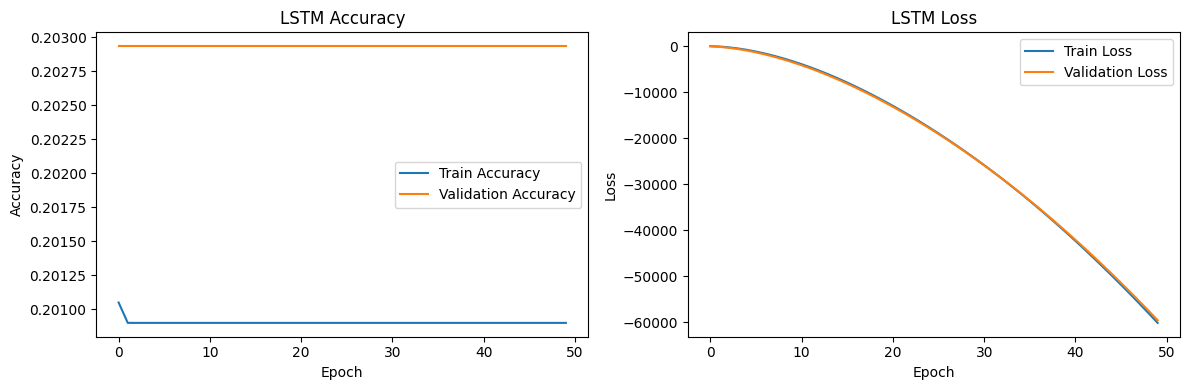

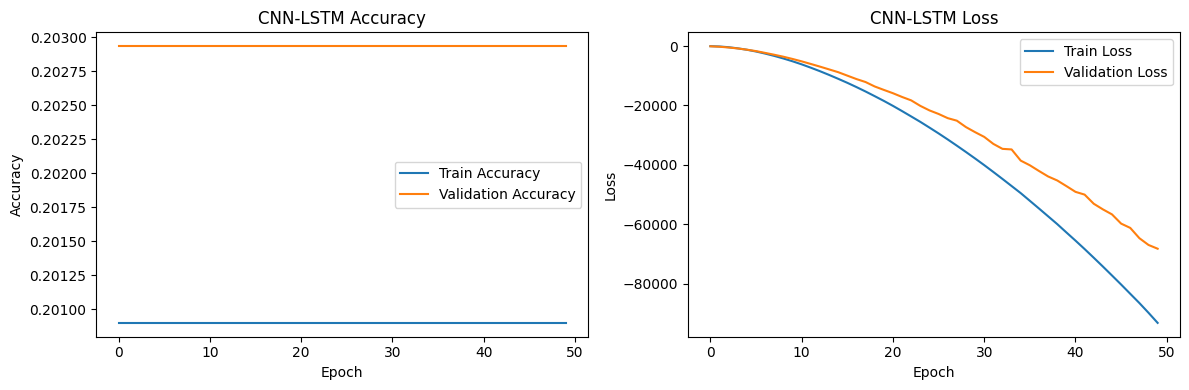

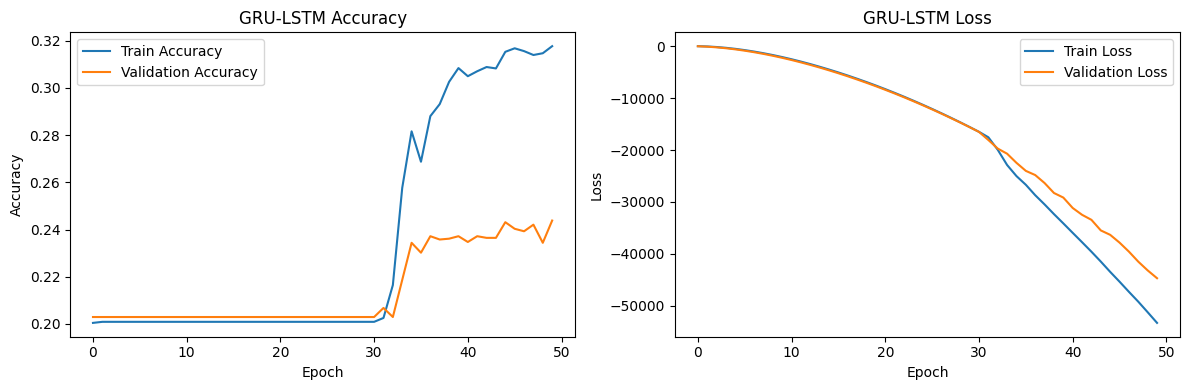

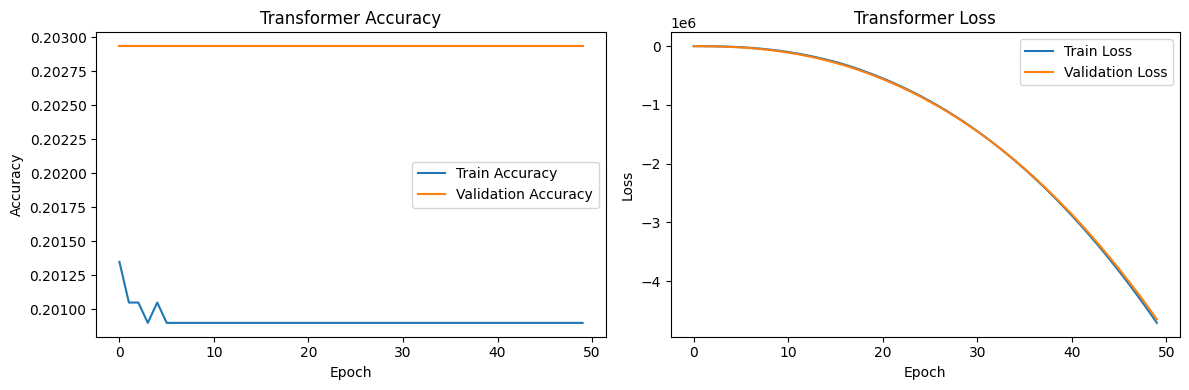

In [53]:
import matplotlib.pyplot as plt # Import the matplotlib library and assign it to the alias 'plt'

def plot_training_history(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training history for each model
plot_training_history(history_lstm, "LSTM")
plot_training_history(history_cnn_lstm, "CNN-LSTM")
plot_training_history(history_gru_lstm, "GRU-LSTM")
plot_training_history(history_transformer, "Transformer")

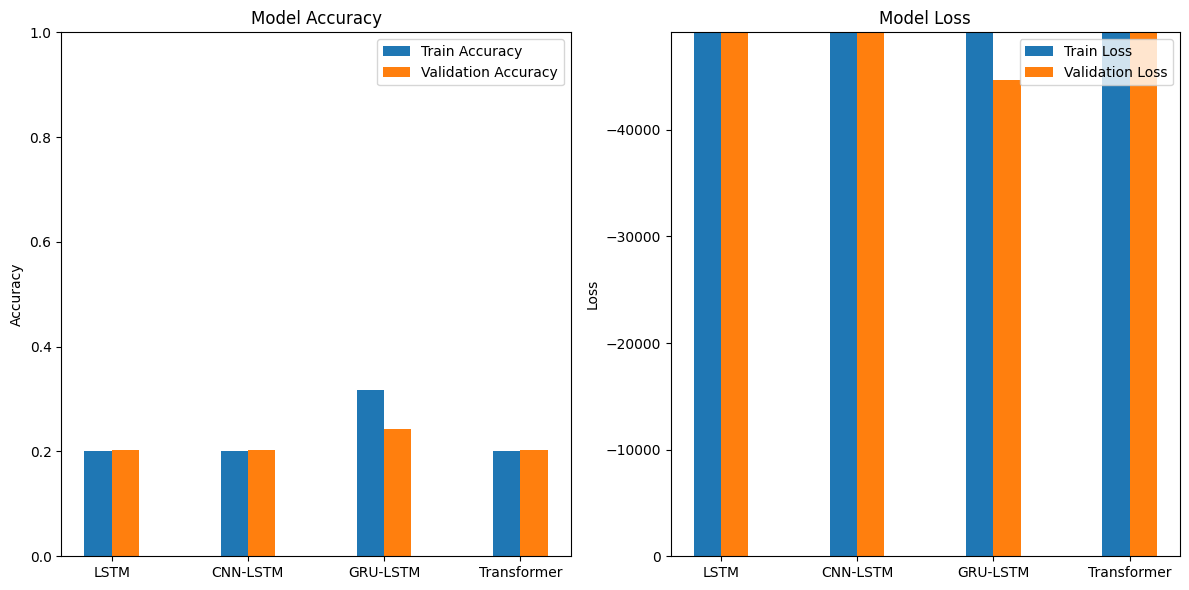

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def plot_training_metrics(histories, model_names):
    # Extract final accuracy and loss values
    final_accuracies = [history.history['accuracy'][-1] for history in histories]
    final_val_accuracies = [history.history['val_accuracy'][-1] for history in histories]
    final_losses = [history.history['loss'][-1] for history in histories]
    final_val_losses = [history.history['val_loss'][-1] for history in histories]

    # Set bar width and positions
    bar_width = 0.2
    index = np.arange(len(model_names))

    # Create subplots for accuracy and loss
    plt.figure(figsize=(12, 6))

    # Bar graph for accuracy
    plt.subplot(1, 2, 1)
    plt.bar(index, final_accuracies, bar_width, label='Train Accuracy')
    plt.bar(index + bar_width, final_val_accuracies, bar_width, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xticks(index + bar_width / 2, model_names)
    plt.ylim([0, 1])  # Assuming accuracy is between 0 and 1
    plt.legend()

    # Bar graph for loss
    plt.subplot(1, 2, 2)
    plt.bar(index, final_losses, bar_width, label='Train Loss')
    plt.bar(index + bar_width, final_val_losses, bar_width, label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xticks(index + bar_width / 2, model_names)
    plt.ylim([0, max(final_losses + final_val_losses) * 1.1])  # Adjust y-axis limit
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage with your model histories
histories = [history_lstm, history_cnn_lstm, history_gru_lstm, history_transformer]
model_names = ["LSTM", "CNN-LSTM", "GRU-LSTM", "Transformer"]

plot_training_metrics(histories, model_names)

In [55]:
# Save the models
model_lstm.save('model_lstm.h5')
model_cnn_lstm.save('model_cnn_lstm.h5')
model_gru_lstm.save('model_gru_lstm.h5')
model_transformer.save('model_transformer.h5')

print("Models saved successfully!")

Models saved successfully!


In [56]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Define your custom layer
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, head_size, num_heads, ff_dim, dropout=0, **kwargs):
        super(TransformerBlock, self).__init__(**kwargs)
        self.head_size = head_size
        self.num_heads = num_heads
        self.ff_dim = ff_dim
        self.dropout = dropout

    def call(self, inputs):
        x = tf.keras.layers.MultiHeadAttention(key_dim=self.head_size, num_heads=self.num_heads)(inputs, inputs)
        x = tf.keras.layers.Dropout(self.dropout)(x)
        x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)
        res = x + inputs  # Residual connection
        x = tf.keras.layers.Dense(self.ff_dim, activation='relu')(res)
        x = tf.keras.layers.Dropout(self.dropout)(x)
        x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x)
        return x

    def get_config(self):
        config = super(TransformerBlock, self).get_config()
        config.update({
            'head_size': self.head_size,
            'num_heads': self.num_heads,
            'ff_dim': self.ff_dim,
            'dropout': self.dropout,
        })
        return config

# Create a custom object dictionary
custom_objects = {
    'TransformerBlock': TransformerBlock,
    'MultiHeadAttention': tf.keras.layers.MultiHeadAttention,
    'LayerNormalization': tf.keras.layers.LayerNormalization,
    'Dropout': tf.keras.layers.Dropout,
    'Dense': tf.keras.layers.Dense,
    'Embedding': tf.keras.layers.Embedding,
    'GlobalAveragePooling1D': tf.keras.layers.GlobalAveragePooling1D
}

# # Load the models
# loaded_model_lstm = load_model('model_lstm.h5')
# loaded_model_cnn_lstm = load_model('model_cnn_lstm.h5')
# loaded_model_gru_lstm = load_model('model_gru_lstm.h5')
# loaded_model_transformer = load_model('model_transformer.h5', custom_objects=custom_objects)

# print("Models loaded successfully!")

In [57]:
from tensorflow.keras.models import load_model

# Load the models
loaded_model_lstm = load_model('model_lstm.h5')
loaded_model_cnn_lstm = load_model('model_cnn_lstm.h5')
loaded_model_gru_lstm = load_model('model_gru_lstm.h5')
#loaded_model_transformer = load_model('model_transformer.h5')

print("Models loaded successfully!")

Models loaded successfully!


In [58]:
# loaded_model_transformer = load_model('model_transformer.h5', custom_objects=custom_objects)


In [59]:
!pip install keras-tuner

In [60]:
from kerastuner import HyperModel, RandomSearch

class LSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=hp.Int('embedding_dim', 64, 256, step=64)))
        model.add(LSTM(hp.Int('lstm_units', 32, 128, step=32), return_sequences=True))
        model.add(LSTM(hp.Int('lstm_units_2', 32, 128, step=32)))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

# Define the hypermodel
hypermodel = LSTMHyperModel()

# Search for the best hyperparameters
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_tuning'
)

# Start the hyperparameter search
tuner.search(X_train_padded, Y_train, epochs=10, validation_data=(X_test_padded, Y_test), batch_size=64)

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Print the summary of the best model
best_model.summary()

# Evaluate the best model
evaluate_model(best_model, X_test_padded, Y_test, "Best LSTM Hyperparameter Model")

Reloading Tuner from my_dir/lstm_tuning/tuner0.json


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 192)            │       9,600,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 200, 64)             │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,768,769 (37.26 MB)

 Trainable params: 9,768,769 (37.26 MB)

 Non-trainable params: 0 (0.00 B)

90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Evaluation metrics for Best LSTM Hyperparameter Model:
Accuracy: 0.2029
Precision: 0.0412
Recall: 0.2029
F1-score: 0.0685




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
from kerastuner import HyperModel, RandomSearch
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, GRU, MultiHeadAttention, LayerNormalization, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential

class LSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=hp.Int('embedding_dim', 64, 256, step=64)))
        model.add(LSTM(hp.Int('lstm_units', 32, 128, step=32), return_sequences=True))
        model.add(LSTM(hp.Int('lstm_units_2', 32, 128, step=32)))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

class LSTMCNNHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=hp.Int('embedding_dim', 64, 256, step=64)))
        model.add(Conv1D(filters=hp.Int('filters', 32, 128, step=32), kernel_size=3, padding='same', activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(LSTM(hp.Int('lstm_units', 32, 128, step=32)))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

class LSTMGRUHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=hp.Int('embedding_dim', 64, 256, step=64)))
        model.add(GRU(hp.Int('gru_units', 32, 128, step=32), return_sequences=True))
        model.add(GRU(hp.Int('gru_units_2', 32, 128, step=32)))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

class TransformerHyperModel(HyperModel):
    def build(self, hp):
        input_layer = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,))
        x = Embedding(input_dim=MAX_NB_WORDS, output_dim=hp.Int('embedding_dim', 64, 256, step=64))(input_layer)
        x = TransformerBlock(x, head_size=128, num_heads=8, ff_dim=128)  # Using your defined TransformerBlock
        x = GlobalAveragePooling1D()(x)
        x = Dense(32, activation='relu')(x)
        x = Dense(1, activation='sigmoid')(x)

        model = tf.keras.models.Model(inputs=input_layer, outputs=x)
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

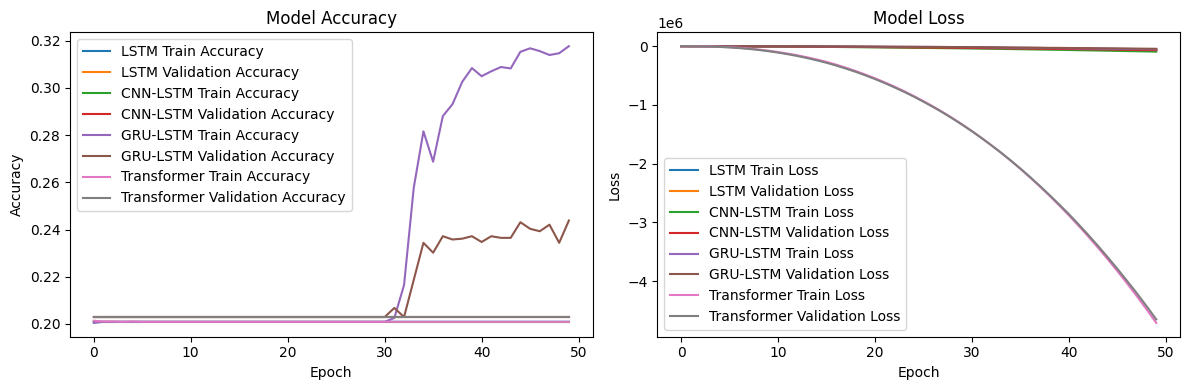

In [62]:
import matplotlib.pyplot as plt

def plot_training_history(histories, model_names):
    plt.figure(figsize=(12, 4))

    # Plot training accuracy values
    plt.subplot(1, 2, 1)
    for history, model_name in zip(histories, model_names):
        plt.plot(history.history['accuracy'], label=f'{model_name} Train Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{model_name} Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot training loss values
    plt.subplot(1, 2, 2)
    for history, model_name in zip(histories, model_names):
        plt.plot(history.history['loss'], label=f'{model_name} Train Loss')
        plt.plot(history.history['val_loss'], label=f'{model_name} Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming you have the training history objects for each model:
# history_lstm, history_cnn_lstm, history_gru_lstm, history_transformer

# Call the function to visualize the performance
plot_training_history([history_lstm, history_cnn_lstm, history_gru_lstm, history_transformer],
                      ['LSTM', 'CNN-LSTM', 'GRU-LSTM', 'Transformer'])

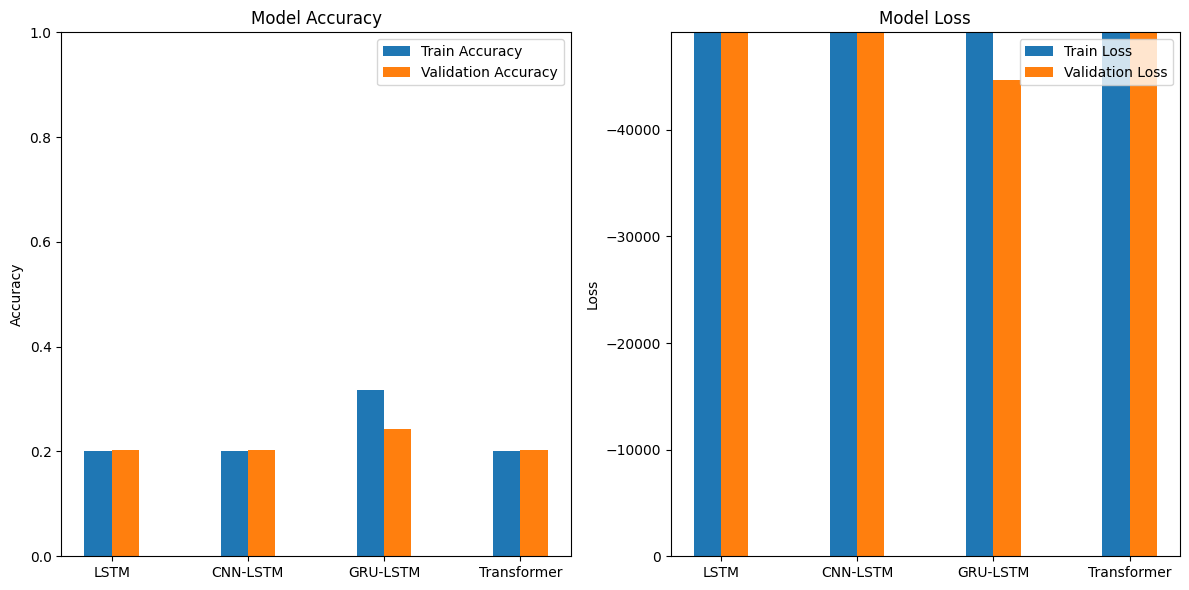

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, precision_recall_curve

def plot_training_metrics(histories, model_names):
    final_accuracies = [history.history['accuracy'][-1] for history in histories]
    final_val_accuracies = [history.history['val_accuracy'][-1] for history in histories]
    final_losses = [history.history['loss'][-1] for history in histories]
    final_val_losses = [history.history['val_loss'][-1] for history in histories]

    bar_width = 0.2
    index = np.arange(len(model_names))

    plt.figure(figsize=(12, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.bar(index, final_accuracies, bar_width, label='Train Accuracy')
    plt.bar(index + bar_width, final_val_accuracies, bar_width, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xticks(index + bar_width / 2, model_names)
    plt.ylim([0, 1])
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.bar(index, final_losses, bar_width, label='Train Loss')
    plt.bar(index + bar_width, final_val_losses, bar_width, label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xticks(index + bar_width / 2, model_names)
    plt.ylim([0, max(final_losses + final_val_losses) * 1.1])
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.grid()
    plt.show()

def print_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred)
    print("Classification Report:")
    print(report)

# Example usage
# Replace with your actual model histories
histories = [history_lstm, history_cnn_lstm, history_gru_lstm, history_transformer]  # Your model histories
model_names = ["LSTM", "CNN-LSTM", "GRU-LSTM", "Transformer"]  # Your model names

# Call the functions to visualize metrics
plot_training_metrics(histories, model_names)

# Assuming y_true are the true labels and y_pred are the predicted labels
# y_scores are the predicted probabilities for the positive class
y_true = np.array([0, 1, 1, 0, 1, 0])

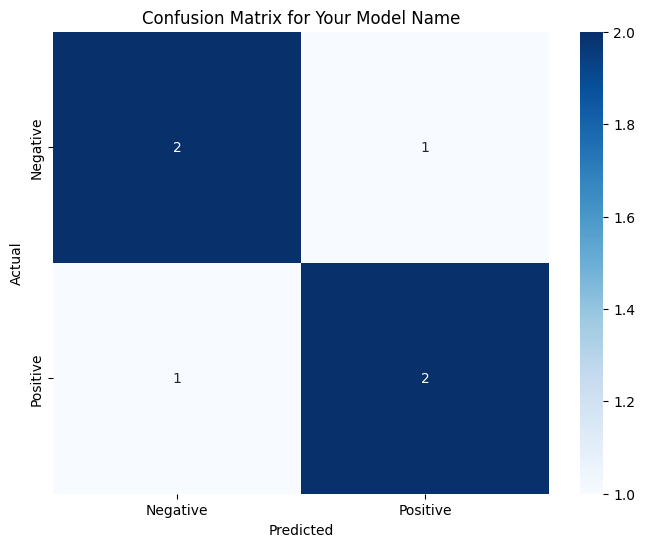

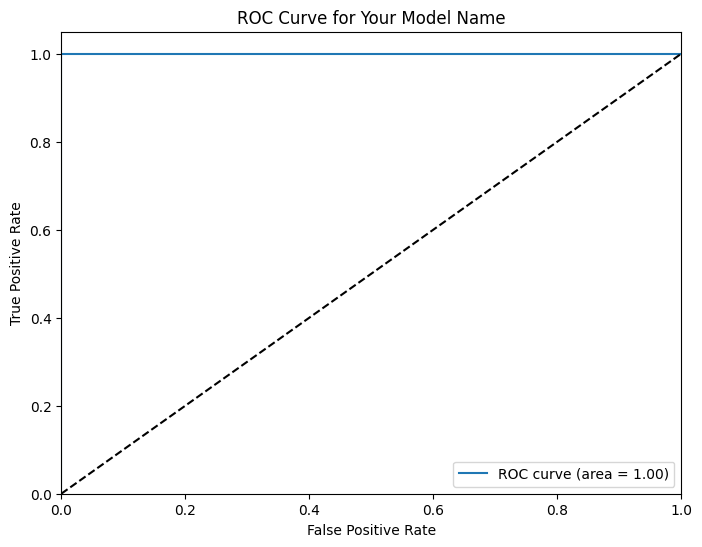

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Example usage
# Assuming y_true are the true labels and y_pred are the predicted labels
# y_scores are the predicted probabilities for the positive class
y_true = np.array([0, 1, 1, 0, 1, 0])  # Replace with your actual labels
y_pred = np.array([0, 1, 0, 0, 1, 1])  # Replace with your predicted labels
y_scores = np.array([0.2, 0.8, 0.6, 0.4, 0.9, 0.1])  # Replace with your predicted probabilities

model_name = "Your Model Name"  # Replace with your model name

plot_confusion_matrix(y_true, y_pred, model_name)
plot_roc_curve(y_true, y_scores, model_name)